## Step1. 데이터 탐색 (EDA : Exploratory Data Analysis)

In [203]:
import pandas as pd

In [204]:
# 윈도우 환경에서 파일을 그대로 읽으면 유니코드 에러 발생, encoding을 CP949로 강제 지정해준다
data = pd.read_csv('Input/dfe_mct_data_set.csv',encoding='CP949')
## data = pd.read_csv('../Input/creditcard.csv',header=None)

In [205]:
print("Credit Card Sales Data -  rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Sales Data -  rows: 217607  columns: 13


In [206]:
data.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA
0,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400
1,AA359351932,32,M,MM270435483,215000,편의점,127.027019,37.587212,20171011,195305,0,0,500
2,AA163500364,24,F,MM270435483,215000,편의점,127.027019,37.587212,20171002,215852,1,0,600
3,AA301810473,47,M,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700
4,AA375934003,24,M,MM346843093,215000,편의점,127.027019,37.587212,20171011,92733,1,0,800


In [207]:
data.keys()

Index(['CLNN', 'CLN_AGE', 'SEX_CCD', 'MCT_N', 'MCT_RY_CD', 'MCT_RY_NM',
       'LAL_MCT_XC_VL', 'LAL_MCT_YC_VL', 'APV_TS_D', 'APV_TS_DL_TM', 'CRD_TCD',
       'NS_MS_CN', 'SAA'],
      dtype='object')

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217607 entries, 0 to 217606
Data columns (total 13 columns):
CLNN             217607 non-null object
CLN_AGE          217607 non-null int64
SEX_CCD          217607 non-null object
MCT_N            217607 non-null object
MCT_RY_CD        217607 non-null int64
MCT_RY_NM        217607 non-null object
LAL_MCT_XC_VL    217607 non-null float64
LAL_MCT_YC_VL    217607 non-null float64
APV_TS_D         217607 non-null int64
APV_TS_DL_TM     217607 non-null int64
CRD_TCD          217607 non-null int64
NS_MS_CN         217607 non-null int64
SAA              217607 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 21.6+ MB


In [209]:
data.describe()

,CLN_AGE,MCT_RY_CD,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA
count,217607.000000,217607.000000,217607.000000,217607.000000,2.176070e+05,217607.000000,217607.000000,217607.000000,2.176070e+05
mean,33.038735,371046.740224,127.029934,37.586242,2.017102e+07,146541.209979,0.663306,0.023055,1.680763e+04
std,13.646205,201573.724514,0.001939,0.001874,8.116759e+00,51319.520947,0.472580,0.324283,1.211919e+05
min,14.000000,115000.000000,127.023601,37.582073,2.017100e+07,0.000000,0.000000,0.000000,-5.000000e+06
25%,23.000000,215000.000000,127.029160,37.584771,2.017101e+07,120350.000000,0.000000,0.000000,2.900000e+03
50%,27.000000,312000.000000,127.029640,37.586536,2.017102e+07,145618.000000,1.000000,0.000000,5.400000e+03
75%,43.000000,331000.000000,127.031232,37.587526,2.017102e+07,184605.000000,1.000000,0.000000,1.100000e+04
max,95.000000,982000.000000,127.034845,37.590431,2.017103e+07,235959.000000,1.000000,24.000000,1.500000e+07


In [210]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline

# Feature별 histogram
# data.hist(figsize = (15,15))
# plt.show()

In [211]:
# 한글 폰트가 깨지는 문제 해결용
from matplotlib.pyplot import rc
rc('font',family='New Gulim')

### (1) 연령별 분포

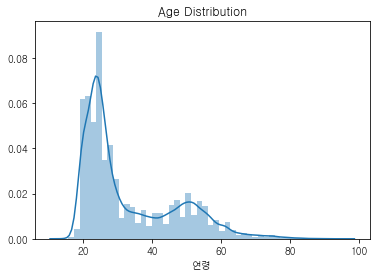

count    217607.000000
mean         33.038735
std          13.646205
min          14.000000
25%          23.000000
50%          27.000000
75%          43.000000
max          95.000000
Name: CLN_AGE, dtype: float64

In [212]:
# 연령별 분포
import seaborn as sns

sns.distplot(data['CLN_AGE'])
plt.xlabel("연령")
plt.title("Age Distribution") # You can comment this line out if you don't need title
plt.show()
data['CLN_AGE'].describe()

#### 이용자의 대부분이 20대에 분포되어 있으며, 평균 연령은 33세이다

### (2) 일자별 분포

In [213]:
# 거래일자별 분포를 보기 위해 데이터 포맷을 datatime으로 바꾸고, 일자 apv_day 추가

data['APV_TS_D']=data['APV_TS_D'].astype(str)
data['APV_TS_D']=pd.to_datetime(data['APV_TS_D'], format='%Y%m%d')

data['APV_DAY'] = data['APV_TS_D'].dt.day

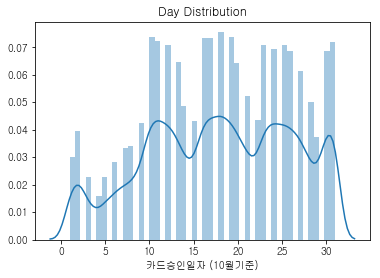

In [214]:
# 거래일자별 분포

sns.distplot(data['APV_DAY'])
plt.xlabel("카드승인일자 (10월기준)")
plt.title("Day Distribution") # You can comment this line out if you don't need title
plt.show()

#### 일자별 분포를 봤을 때 월 초에는 거래량이 적은데, 이는 2017년 10월 첫째주가 추석 연휴였기 때문으로 추정됨

### (3) 요일별 분포

In [215]:
data['APV_WEEK'] = data['APV_TS_D'].dt.day_name()

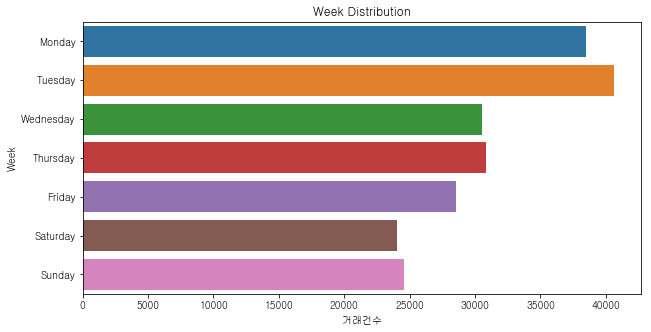

In [216]:
# 요일별 분포

week_count=data['APV_WEEK'].value_counts()
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10,5))
sns.barplot(week_count.values, week_count.index, order=order)
plt.ylabel("Week")
plt.xlabel("거래건수")
plt.title("Week Distribution")
plt.show()

#### 요일별 건수를 보면 월,화에 거래가 많은 것처럼 보이는데, 10월에 다른 요일보다 월,화가 더 많기 때문에 왜곡이 발생할 수 있음. <br>하지만 토,일에 평소보다 이용이 줄어드는 것은 (왜곡에도 불구하고) 명확해보인다.

### (4) 성별 분포

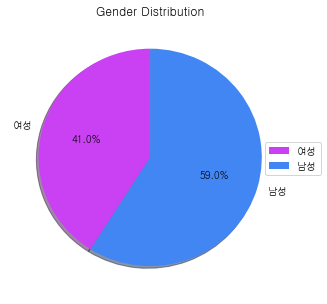

In [217]:
# 성별 분포
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
female = data[data['SEX_CCD']=='F']['CLNN'].count()
male = data[data['SEX_CCD']=='M']['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

#### 여성이 41%, 남성이 59%로 남성이 조금 더 많다

### 아래부터는 미완성 (시각화 보완 필요) - 가맹점 업종에 focusing된 EDA 필요

### 가맹점 업종별 건수 

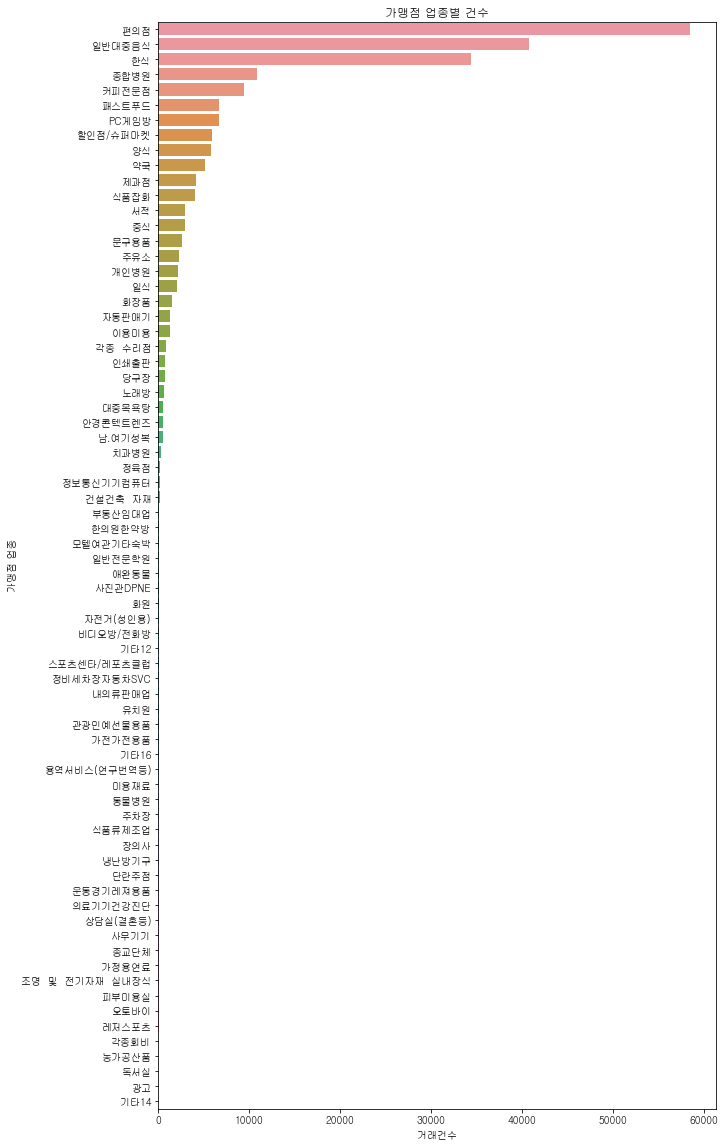

In [218]:
# 가맹점 업종별 단순 건수 그래프

plt.figure(figsize=(10,20))
sns.countplot(y='MCT_RY_NM', data=data, order = data['MCT_RY_NM'].value_counts().index)
plt.xlabel("거래건수")
plt.ylabel("가맹점 업종")
plt.title("가맹점 업종별 건수")
plt.show()